In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [183]:
data = pd.read_excel("C:/Users/bared/Downloads/Data_Train.xlsx")
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [185]:
data.shape

(10683, 11)

In [186]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [187]:
data.count()

Airline            10683
Date_of_Journey    10683
Source             10683
Destination        10683
Route              10682
Dep_Time           10683
Arrival_Time       10683
Duration           10683
Total_Stops        10682
Additional_Info    10683
Price              10683
dtype: int64

In [188]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [189]:
data[data['Route'].isnull() | data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [190]:
data.dropna(inplace=True)

In [191]:
data.count()

Airline            10682
Date_of_Journey    10682
Source             10682
Destination        10682
Route              10682
Dep_Time           10682
Arrival_Time       10682
Duration           10682
Total_Stops        10682
Additional_Info    10682
Price              10682
dtype: int64

In [192]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Exploratory Data Analysis And Feature Engineering

1.Duration
2.Date_of_Journey 
3.Dep_Time
4.Arrival_Time
5.Total_Stops

# Duration

In [193]:
# Function to convert duration to minutes
def convert_duration_to_minutes(duration):
    # Ensure the input is a string
    duration = str(duration)
    hours, minutes = 0, 0
    if 'h' in duration:
        hours = int(duration.split('h')[0].strip())
        duration = duration.split('h')[1].strip()
    if 'm' in duration:
        minutes = int(duration.split('m')[0].strip())
    return hours * 60 + minutes

# Apply the function
data['Duration_Minutes'] = data['Duration'].apply(convert_duration_to_minutes)
data['Duration_Minutes']
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_Minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,170
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,445
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,325
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,285


 ### Departure Time And Arrival Time

In [194]:
data['Dep_Time'] = pd.to_datetime(data['Dep_Time'], errors='coerce')
data['Arrival_Time'] = pd.to_datetime(data['Arrival_Time'], errors='coerce')
data.dtypes

C:\Users\bared\AppData\Local\Temp\ipykernel_16268\3768233463.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Dep_Time'] = pd.to_datetime(data['Dep_Time'], errors='coerce')
C:\Users\bared\AppData\Local\Temp\ipykernel_16268\3768233463.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Arrival_Time'] = pd.to_datetime(data['Arrival_Time'], errors='coerce')


Airline                     object
Date_of_Journey             object
Source                      object
Destination                 object
Route                       object
Dep_Time            datetime64[ns]
Arrival_Time        datetime64[ns]
Duration                    object
Total_Stops                 object
Additional_Info             object
Price                        int64
Duration_Minutes             int64
dtype: object

In [195]:
data['Dep_Time_hours'] = data['Dep_Time'].dt.hour
data['Dep_Time_minutes'] = data['Dep_Time'].dt.minute
data['Arrival_Time_hours'] = data['Arrival_Time'].dt.hour
data['Arrival_Time_minutes'] = data['Arrival_Time'].dt.minute
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_Minutes,Dep_Time_hours,Dep_Time_minutes,Arrival_Time_hours,Arrival_Time_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,2024-12-16 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,170,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-12-16 05:50:00,2024-12-16 13:15:00,7h 25m,2 stops,No info,7662,445,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,2024-12-16 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,1140,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,2024-12-16 18:05:00,2024-12-16 23:30:00,5h 25m,1 stop,No info,6218,325,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,2024-12-16 16:50:00,2024-12-16 21:35:00,4h 45m,1 stop,No info,13302,285,16,50,21,35


### Date Of Journey

In [196]:
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'],errors='coerce', dayfirst='True')

In [197]:
data['Date_of_Journey'].dt.year.unique() 

array([2019])

In [198]:
data['Day'] = data['Date_of_Journey'].dt.day
data['Month'] = data['Date_of_Journey'].dt.month



In [199]:
# data.drop(['day', 'month'], inplace=True, axis=1)
data.dtypes

Airline                         object
Date_of_Journey         datetime64[ns]
Source                          object
Destination                     object
Route                           object
Dep_Time                datetime64[ns]
Arrival_Time            datetime64[ns]
Duration                        object
Total_Stops                     object
Additional_Info                 object
Price                            int64
Duration_Minutes                 int64
Dep_Time_hours                   int32
Dep_Time_minutes                 int32
Arrival_Time_hours               int32
Arrival_Time_minutes             int32
Day                              int32
Month                            int32
dtype: object

Total Stops


In [200]:
data['Total_Stops'].value_counts()


Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [201]:
data['Total_Stops'] = data['Total_Stops'].replace({'1 stop': 1,
'non-stop': 0,
'2 stops': 2,
'3 stops': 3, 
'4 stops': 4})

In [202]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_Minutes,Dep_Time_hours,Dep_Time_minutes,Arrival_Time_hours,Arrival_Time_minutes,Day,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-12-16 22:20:00,2024-03-22 01:10:00,2h 50m,0,No info,3897,170,22,20,1,10,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-12-16 05:50:00,2024-12-16 13:15:00,7h 25m,2,No info,7662,445,5,50,13,15,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-12-16 09:25:00,2024-06-10 04:25:00,19h,2,No info,13882,1140,9,25,4,25,9,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-12-16 18:05:00,2024-12-16 23:30:00,5h 25m,1,No info,6218,325,18,5,23,30,12,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-12-16 16:50:00,2024-12-16 21:35:00,4h 45m,1,No info,13302,285,16,50,21,35,1,3


# ADDITIONAL INFO

In [203]:
data['Additional_Info'].value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [204]:
data.drop('Additional_Info', axis=1, inplace=True)
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Duration_Minutes,Dep_Time_hours,Dep_Time_minutes,Arrival_Time_hours,Arrival_Time_minutes,Day,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-12-16 22:20:00,2024-03-22 01:10:00,2h 50m,0,3897,170,22,20,1,10,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-12-16 05:50:00,2024-12-16 13:15:00,7h 25m,2,7662,445,5,50,13,15,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-12-16 09:25:00,2024-06-10 04:25:00,19h,2,13882,1140,9,25,4,25,9,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-12-16 18:05:00,2024-12-16 23:30:00,5h 25m,1,6218,325,18,5,23,30,12,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-12-16 16:50:00,2024-12-16 21:35:00,4h 45m,1,13302,285,16,50,21,35,1,3


In [205]:
data.select_dtypes(['object']).columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration'], dtype='object')

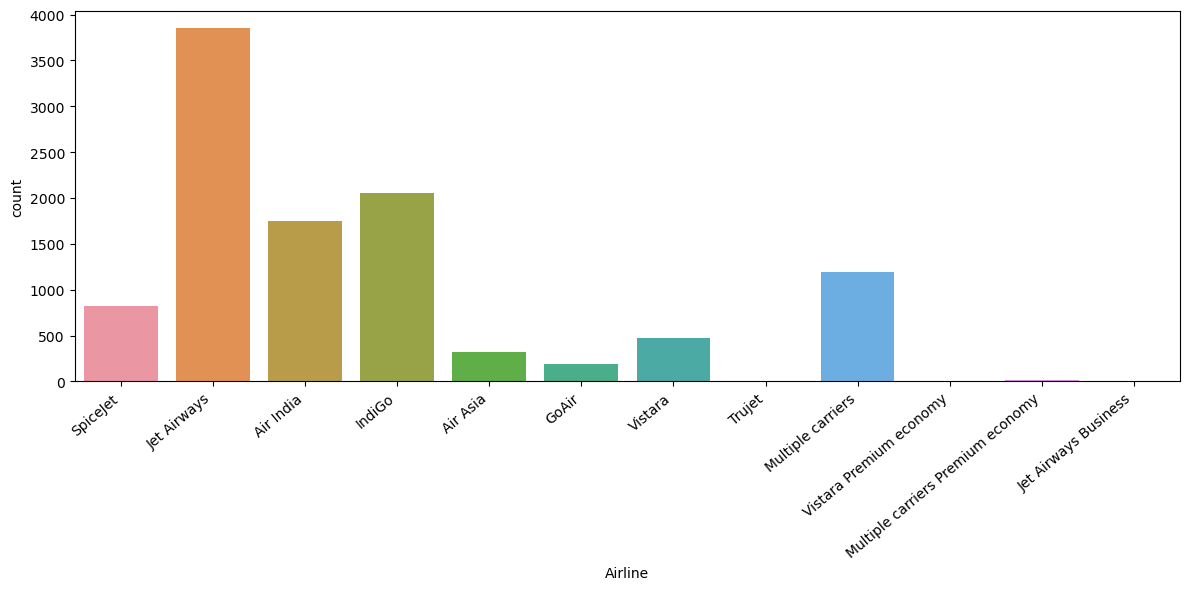

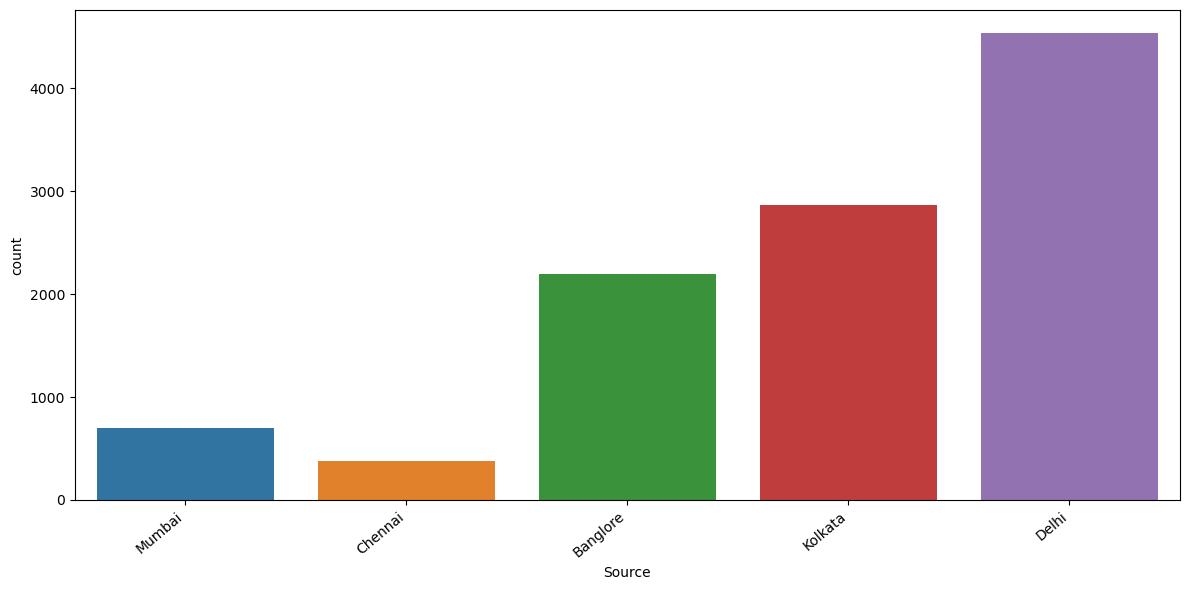

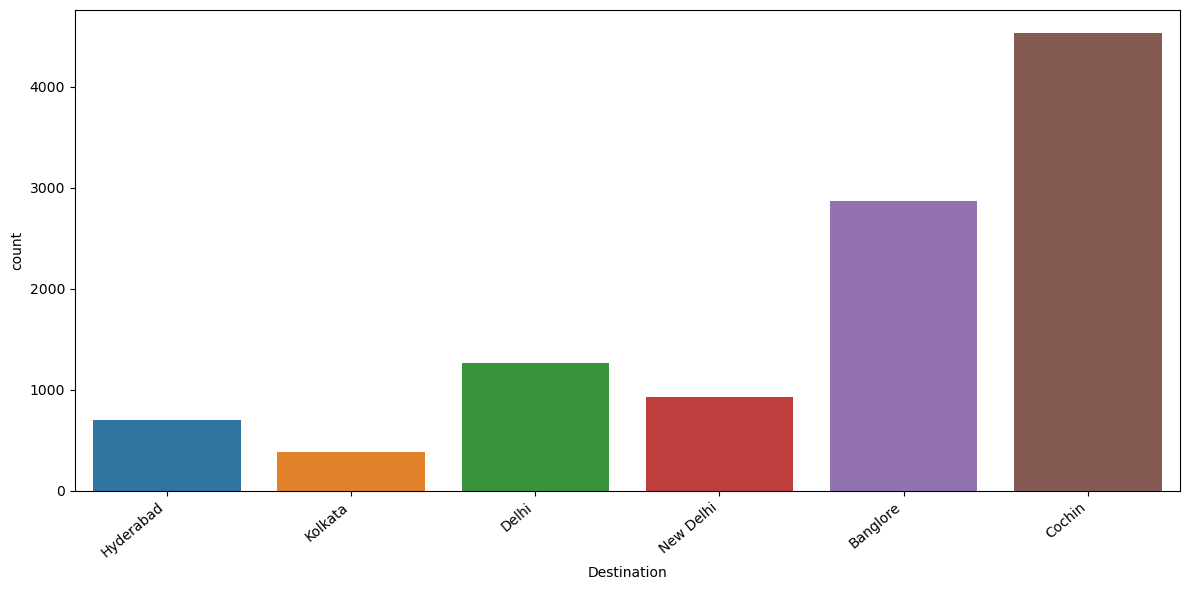

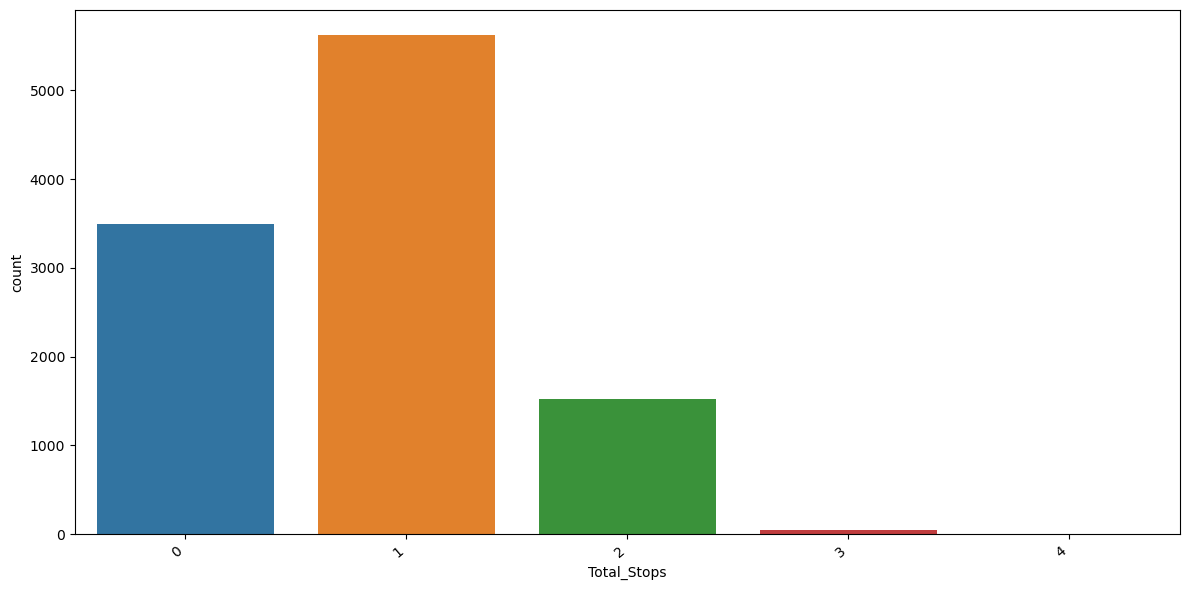

In [206]:
for i in ['Airline', 'Source', 'Destination', 'Total_Stops']:
    plt.figure(figsize=(12,6))
    ax = sns.countplot(data=data.sort_values('Price', ascending=True), x=i)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40,ha='right')
    plt.tight_layout()
    plt.show()

### AIRLINE

In [207]:
data['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

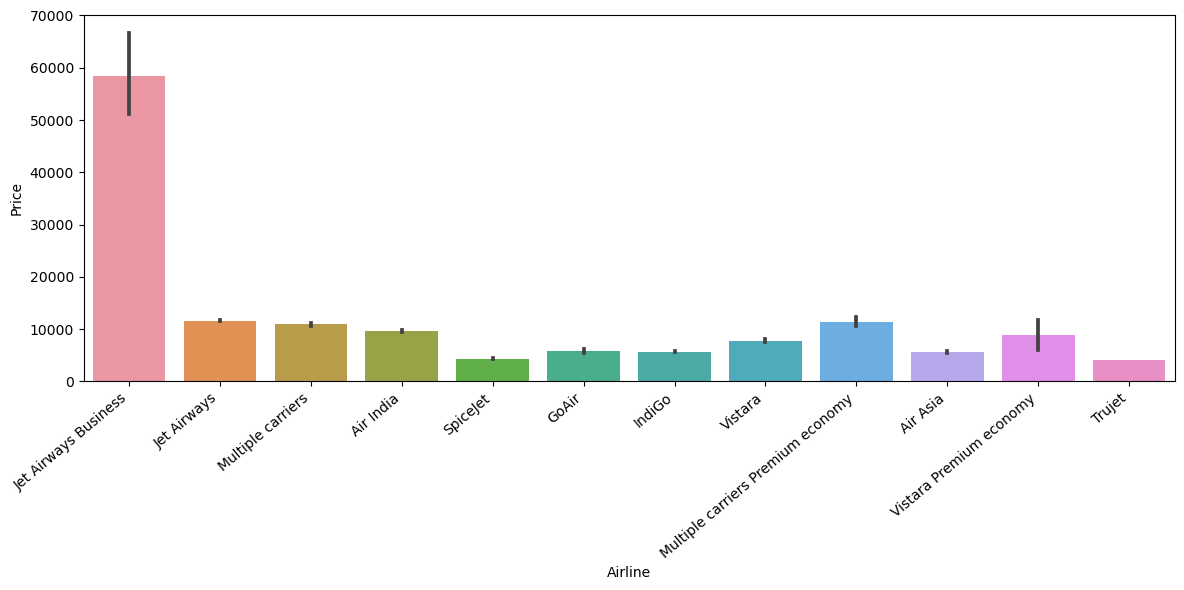

In [208]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x='Airline', y='Price', data= data.sort_values('Price', ascending= False))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.tight_layout()
plt.show()

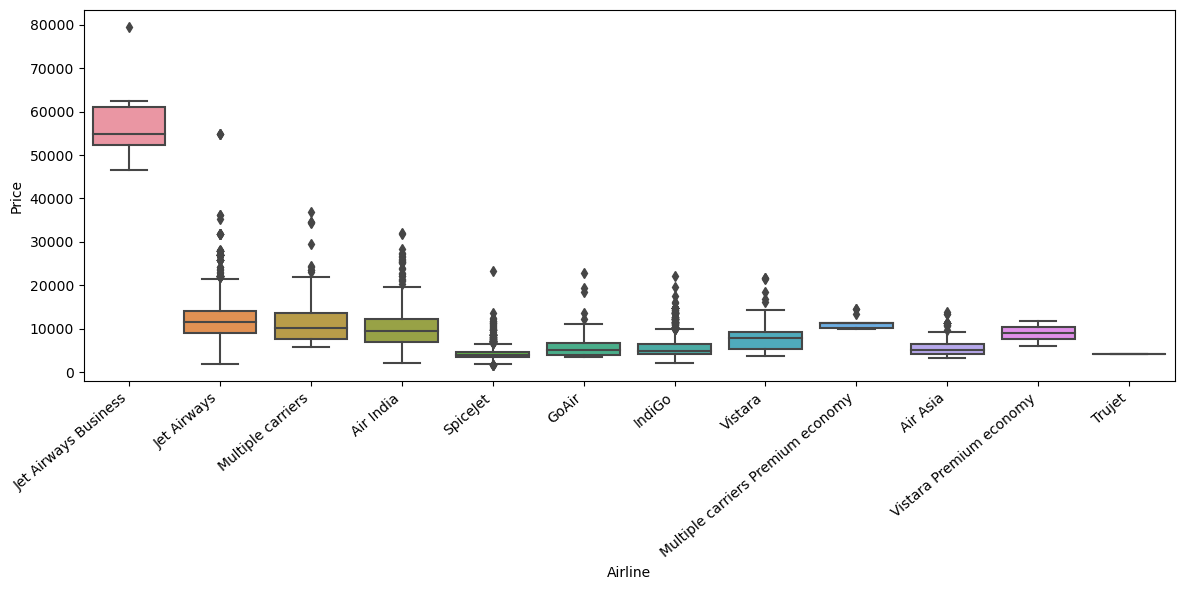

In [209]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x='Airline', y='Price', data= data.sort_values('Price', ascending= False))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.tight_layout()
plt.show()

In [210]:
data.groupby('Airline').describe()['Price'].sort_values('mean', ascending=False)

,count,mean,min,25%,50%,75%,max,std
Airline,,,,,,,,
Jet Airways Business,6.0,58358.666667,46490.0,52243.0,54747.0,61122.50,79512.0,11667.596748
Jet Airways,3849.0,11643.923357,1840.0,9134.0,11467.0,14151.00,54826.0,4258.940578
Multiple carriers Premium economy,13.0,11418.846154,9845.0,10161.0,11269.0,11269.00,14629.0,1717.153936
Multiple carriers,1196.0,10902.678094,5797.0,7723.0,10197.0,13587.00,36983.0,3721.234997
Air India,1751.0,9612.427756,2050.0,6891.0,9443.0,12219.00,31945.0,3901.734561
Vistara Premium economy,3.0,8962.333333,5969.0,7547.0,9125.0,10459.00,11793.0,2915.405518
Vistara,479.0,7796.348643,3687.0,5403.0,7980.0,9345.00,21730.0,2914.298578
GoAir,194.0,5861.056701,3398.0,3898.0,5135.0,6811.25,22794.0,2703.585767
IndiGo,2053.0,5673.682903,2227.0,4226.0,5000.0,6494.00,22153.0,2264.142168


In [211]:
Airline = pd.get_dummies(data['Airline'], dtype=int)
Airline.head()

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [212]:
data = pd.concat([data, Airline], axis=1)
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-12-16 22:20:00,2024-03-22 01:10:00,2h 50m,0,3897,...,0,1,0,0,0,0,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-12-16 05:50:00,2024-12-16 13:15:00,7h 25m,2,7662,...,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-12-16 09:25:00,2024-06-10 04:25:00,19h,2,13882,...,0,0,1,0,0,0,0,0,0,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-12-16 18:05:00,2024-12-16 23:30:00,5h 25m,1,6218,...,0,1,0,0,0,0,0,0,0,0
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-12-16 16:50:00,2024-12-16 21:35:00,4h 45m,1,13302,...,0,1,0,0,0,0,0,0,0,0


### SOURCE AND DESTINATION

In [213]:
list1 =['Source','Destination']
for l in list1:
    print(data[[l]].value_counts(), '\n')

Source  
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64 

Destination
Cochin         4536
Banglore       2871
Delhi          1265
New Delhi       932
Hyderabad       697
Kolkata         381
Name: count, dtype: int64 



In [214]:
data = pd.get_dummies(data=data,columns=list1, dtype=int)
data.head()

,Airline,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Duration_Minutes,Dep_Time_hours,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,2019-03-24,BLR → DEL,2024-12-16 22:20:00,2024-03-22 01:10:00,2h 50m,0,3897,170,22,...,0,0,0,0,0,0,0,0,0,1
1,Air India,2019-05-01,CCU → IXR → BBI → BLR,2024-12-16 05:50:00,2024-12-16 13:15:00,7h 25m,2,7662,445,5,...,0,0,1,0,1,0,0,0,0,0
2,Jet Airways,2019-06-09,DEL → LKO → BOM → COK,2024-12-16 09:25:00,2024-06-10 04:25:00,19h,2,13882,1140,9,...,0,1,0,0,0,1,0,0,0,0
3,IndiGo,2019-05-12,CCU → NAG → BLR,2024-12-16 18:05:00,2024-12-16 23:30:00,5h 25m,1,6218,325,18,...,0,0,1,0,1,0,0,0,0,0
4,IndiGo,2019-03-01,BLR → NAG → DEL,2024-12-16 16:50:00,2024-12-16 21:35:00,4h 45m,1,13302,285,16,...,0,0,0,0,0,0,0,0,0,1


# ROUTE

In [215]:
route = data[['Route']]
route.head()

,Route
0,BLR → DEL
1,CCU → IXR → BBI → BLR
2,DEL → LKO → BOM → COK
3,CCU → NAG → BLR
4,BLR → NAG → DEL


In [216]:
data['Total_Stops'].value_counts()

Total_Stops
1    5625
0    3491
2    1520
3      45
4       1
Name: count, dtype: int64

In [217]:
route['Route_1'] = route['Route'].str.split('→').str[0]
route['Route_2'] = route['Route'].str.split('→').str[1]
route['Route_3'] = route['Route'].str.split('→').str[2]
route['Route_4'] = route['Route'].str.split('→').str[3]
route['Route_5'] = route['Route'].str.split('→').str[4]
route.head()

C:\Users\bared\AppData\Local\Temp\ipykernel_16268\962169124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route['Route_1'] = route['Route'].str.split('→').str[0]
C:\Users\bared\AppData\Local\Temp\ipykernel_16268\962169124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route['Route_2'] = route['Route'].str.split('→').str[1]
C:\Users\bared\AppData\Local\Temp\ipykernel_16268\962169124.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,Route,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,BLR,DEL,NaN,NaN,NaN
1,CCU → IXR → BBI → BLR,CCU,IXR,BBI,BLR,NaN
2,DEL → LKO → BOM → COK,DEL,LKO,BOM,COK,NaN
3,CCU → NAG → BLR,CCU,NAG,BLR,NaN,NaN
4,BLR → NAG → DEL,BLR,NAG,DEL,NaN,NaN


In [218]:
route.fillna('None', inplace=True )
route.head()

C:\Users\bared\AppData\Local\Temp\ipykernel_16268\709900322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route.fillna('None', inplace=True )


,Route,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,BLR,DEL,None,None,None
1,CCU → IXR → BBI → BLR,CCU,IXR,BBI,BLR,None
2,DEL → LKO → BOM → COK,DEL,LKO,BOM,COK,None
3,CCU → NAG → BLR,CCU,NAG,BLR,None,None
4,BLR → NAG → DEL,BLR,NAG,DEL,None,None


In [219]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in range(1,6):
    col = 'Route_' + str(i)
    route[col] = le.fit_transform(route[col])
route.head()

C:\Users\bared\AppData\Local\Temp\ipykernel_16268\3669974337.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route[col] = le.fit_transform(route[col])
C:\Users\bared\AppData\Local\Temp\ipykernel_16268\3669974337.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route[col] = le.fit_transform(route[col])
C:\Users\bared\AppData\Local\Temp\ipykernel_16268\3669974337.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,Route,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,0,13,29,13,5
1,CCU → IXR → BBI → BLR,2,25,1,3,5
2,DEL → LKO → BOM → COK,3,32,4,5,5
3,CCU → NAG → BLR,2,34,3,13,5
4,BLR → NAG → DEL,0,34,8,13,5


In [181]:
route.drop('Route',axis=1,inplace=True)
route.head()

C:\Users\bared\AppData\Local\Temp\ipykernel_16268\2170783715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route.drop('Route',axis=1,inplace=True)


,Route_1,Route_2,Route_3,Route_4,Route_5
0,0,13,29,13,5
1,2,25,1,3,5
2,3,32,4,5,5
3,2,34,3,13,5
4,0,34,8,13,5


In [220]:
data = pd.concat([data,route], axis=1)
data.head()

,Airline,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Duration_Minutes,Dep_Time_hours,...,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,2019-03-24,BLR → DEL,2024-12-16 22:20:00,2024-03-22 01:10:00,2h 50m,0,3897,170,22,...,0,0,0,1,BLR → DEL,0,13,29,13,5
1,Air India,2019-05-01,CCU → IXR → BBI → BLR,2024-12-16 05:50:00,2024-12-16 13:15:00,7h 25m,2,7662,445,5,...,0,0,0,0,CCU → IXR → BBI → BLR,2,25,1,3,5
2,Jet Airways,2019-06-09,DEL → LKO → BOM → COK,2024-12-16 09:25:00,2024-06-10 04:25:00,19h,2,13882,1140,9,...,0,0,0,0,DEL → LKO → BOM → COK,3,32,4,5,5
3,IndiGo,2019-05-12,CCU → NAG → BLR,2024-12-16 18:05:00,2024-12-16 23:30:00,5h 25m,1,6218,325,18,...,0,0,0,0,CCU → NAG → BLR,2,34,3,13,5
4,IndiGo,2019-03-01,BLR → NAG → DEL,2024-12-16 16:50:00,2024-12-16 21:35:00,4h 45m,1,13302,285,16,...,0,0,0,1,BLR → NAG → DEL,0,34,8,13,5


In [221]:
data.select_dtypes(['object']).columns

Index(['Airline', 'Route', 'Duration', 'Route'], dtype='object')

In [222]:
data.select_dtypes(['datetime']).columns

Index(['Date_of_Journey', 'Dep_Time', 'Arrival_Time'], dtype='object')

In [223]:
data.drop(['Airline', 'Route', 'Duration'], axis=1, inplace=True)
data.head()

,Date_of_Journey,Dep_Time,Arrival_Time,Total_Stops,Price,Duration_Minutes,Dep_Time_hours,Dep_Time_minutes,Arrival_Time_hours,Arrival_Time_minutes,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_1,Route_2,Route_3,Route_4,Route_5
0,2019-03-24,2024-12-16 22:20:00,2024-03-22 01:10:00,0,3897,170,22,20,1,10,...,0,0,0,0,1,0,13,29,13,5
1,2019-05-01,2024-12-16 05:50:00,2024-12-16 13:15:00,2,7662,445,5,50,13,15,...,0,0,0,0,0,2,25,1,3,5
2,2019-06-09,2024-12-16 09:25:00,2024-06-10 04:25:00,2,13882,1140,9,25,4,25,...,1,0,0,0,0,3,32,4,5,5
3,2019-05-12,2024-12-16 18:05:00,2024-12-16 23:30:00,1,6218,325,18,5,23,30,...,0,0,0,0,0,2,34,3,13,5
4,2019-03-01,2024-12-16 16:50:00,2024-12-16 21:35:00,1,13302,285,16,50,21,35,...,0,0,0,0,1,0,34,8,13,5


In [224]:
data.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time'], axis=1, inplace=True)
# data.drop('Additional_Info', axis=1, inplace=True)
data.head()

,Total_Stops,Price,Duration_Minutes,Dep_Time_hours,Dep_Time_minutes,Arrival_Time_hours,Arrival_Time_minutes,Day,Month,Air Asia,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_1,Route_2,Route_3,Route_4,Route_5
0,0,3897,170,22,20,1,10,24,3,0,...,0,0,0,0,1,0,13,29,13,5
1,2,7662,445,5,50,13,15,1,5,0,...,0,0,0,0,0,2,25,1,3,5
2,2,13882,1140,9,25,4,25,9,6,0,...,1,0,0,0,0,3,32,4,5,5
3,1,6218,325,18,5,23,30,12,5,0,...,0,0,0,0,0,2,34,3,13,5
4,1,13302,285,16,50,21,35,1,3,0,...,0,0,0,0,1,0,34,8,13,5


# Building The Machine Learning Models And Evaluating Them

In [225]:
tem_col=data.columns.to_list()
print(tem_col, '\n')

['Total_Stops', 'Price', 'Duration_Minutes', 'Dep_Time_hours', 'Dep_Time_minutes', 'Arrival_Time_hours', 'Arrival_Time_minutes', 'Day', 'Month', 'Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'] 



In [226]:
new_column = tem_col[ :1] + tem_col[2:]
new_column.append(tem_col[1])
print(new_column, '\n')

['Total_Stops', 'Duration_Minutes', 'Dep_Time_hours', 'Dep_Time_minutes', 'Arrival_Time_hours', 'Arrival_Time_minutes', 'Day', 'Month', 'Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5', 'Price'] 



In [227]:
data = data.reindex(columns=new_column)
data.head()

,Total_Stops,Duration_Minutes,Dep_Time_hours,Dep_Time_minutes,Arrival_Time_hours,Arrival_Time_minutes,Day,Month,Air Asia,Air India,...,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_1,Route_2,Route_3,Route_4,Route_5,Price
0,0,170,22,20,1,10,24,3,0,0,...,0,0,0,1,0,13,29,13,5,3897
1,2,445,5,50,13,15,1,5,0,1,...,0,0,0,0,2,25,1,3,5,7662
2,2,1140,9,25,4,25,9,6,0,0,...,0,0,0,0,3,32,4,5,5,13882
3,1,325,18,5,23,30,12,5,0,0,...,0,0,0,0,2,34,3,13,5,6218
4,1,285,16,50,21,35,1,3,0,0,...,0,0,0,1,0,34,8,13,5,13302


In [228]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = scaler.fit_transform(data)
data[0]

array([-1.22066609, -0.93149778,  1.65415376, -0.2349499 , -1.80043628,
       -0.8900139 ,  1.23728754, -1.46740227, -0.17544968, -0.44278513,
       -0.13600489,  2.05015058, -0.75053033, -0.02370671, -0.35507822,
       -0.03490678, -0.28797191, -0.00967596, -0.21667251, -0.01676082,
        1.96521873, -0.19231927, -0.85909313, -0.60626609, -0.2642058 ,
       -0.60626609, -0.85909313, -0.36651266, -0.2642058 , -0.19231927,
        3.23440464, -1.67418972,  0.13765097,  1.39512392,  0.40974412,
        0.06420744, -1.12553455])

In [229]:
from sklearn.model_selection import train_test_split as tts

x = data[:, :-1]
y = data[:, -1]

In [230]:
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.1, random_state=69)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(9613, 36)
(1069, 36)
(9613,)
(1069,)


## Linear Regression Model

In [231]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [232]:
from sklearn.metrics import mean_squared_error, r2_score

def metrics(y_true, y_pred):
    print(f'RMSE:', mean_squared_error(y_true, y_pred) ** 0.5)
    print(f'R2_score:', r2_score(y_true, y_pred))
    
def accuracy(y_true, y_pred):
    errors = abs(y_true - y_pred)
    mape = 100*np.mean(errors/y_true)
    accuracy = 100-mape
    return accuracy
    

In [233]:
y_pred = model.predict(x_test)

In [234]:
metrics(y_test, y_pred)

RMSE: 0.5321160471819961
R2_score: 0.6513981545005938


In [235]:
accuracy(y_test, y_pred)

72.5561412585498

### Random Forest

In [236]:
from sklearn.ensemble import RandomForestRegressor

model_random_forest = RandomForestRegressor(n_estimators=500, min_samples_split=3)
model_random_forest.fit(x_train, y_train)

RandomForestRegressor(min_samples_split=3, n_estimators=500)

In [237]:
pred_rf = model_random_forest.predict(x_test)

In [238]:
metrics(y_test, pred_rf)

RMSE: 0.37428862361691195
R2_score: 0.8275233836695642


In [239]:
accuracy(y_test, pred_rf)

97.58181224394089